# FINAL PROJECT SUBMISSION

- Student Name: Ian Korir
- Student Pase: Fulltime-Hybrid student
- Scheduled Project Review: 22/03/2024
- Instructor Name: Nikita Njoroge
- Blog Post: 



## Introduction

### Overview

The main goal of this project is to come up with insights to help SIRIAN Car Dealership in optimizing inventory management practices. By analyzing the sales transactions of vehicles, the dealership can gain insights into customer preferences, market demand and pricing strategies, which are crucial factors in inventory management.

## DATA UNDERSTANDING
The "Vehicle Sales and Market Trends Dataset" provides a comprehensive collection of information pertaining to the sales transactions of various vehicles. This dataset encompasses details such as the year, make, model, trim, body type, transmission type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.

### Key Features

Vehicle Details: Includes specific information about each vehicle, such as its make, model, trim, and manufacturing year.

Transaction Information: Provides insights into the sales transactions, including selling prices and sale dates.

Market Trends: MMR values offer an estimate of the market value of each vehicle, allowing for analysis of market trends and fluctuations.

Condition and Mileage: Contains data on the condition of the vehicles as well as their odometer readings, enabling analysis of how these factors influence selling prices.

In [2]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [3]:
#read file into pandas dataframe
df = pd.read_csv('car_prices.csv')

# get summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [4]:
# check for missing values
missing_values = df.isnull().sum()

# display total number 
print(f"Total Missing Values: \n{missing_values}")

Total Missing Values: 
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [5]:
# drop rows with missing values
cleaned_df = df.dropna()
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 61.3+ MB


In [6]:
print(cleaned_df.shape)
cleaned_df.isna().sum()

(472325, 16)


year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

The cleaned dataframe from vehicle sales has 472,325 rows and 16 columns namely: year ,make,trim,body,transmission, vin, state, condition,      odometer, color,  interior,seller,mmr, sellingprice, saledate. There are no missing values.        

Finding out the top five car make brands sold against the total number of cars sold.

In [34]:
# convert saledate column to datetime format
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', infer_datetime_format=True)

# Display the DataFrame with the updated datetime format
print("Updated DataFrame with saledate column in standard datetime format:")
print(df.head())
     


Updated DataFrame with saledate column in standard datetime format:
     year   make                model        trim   body transmission  \
0  2014.0    Kia              Sorento          LX    SUV    automatic   
1  2014.0    Kia              Sorento          LX    SUV    automatic   
2  2015.0    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015.0  Volvo                  S60          T5  Sedan    automatic   
4  2014.0    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia 

C:\Users\user\AppData\Local\Temp\ipykernel_25012\2112219799.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', infer_datetime_format=True)


In [31]:
# exctract year from saledate column
df['year'] = df['saledate'].dt.year  

#  group by year and car make, count sales and select top 10 car make for each year
top_5_cars_sold = df.groupby(['year', 'make']).size().reset_index(name='sales_count') \
     .sort_values(['year', 'sales_count'], ascending=[False, False]) \
         .groupby('year').head()
        
print("Top 10 Car makes sold over time")
top_5_cars_sold

Top 10 Car makes sold over time


,year,make,sales_count
106,2015.0,Ford,59067
99,2015.0,Chevrolet,37236
127,2015.0,Nissan,32149
140,2015.0,Toyota,23452
102,2015.0,Dodge,19271
12,2014.0,Ford,7483
6,2014.0,Chevrolet,6035
32,2014.0,Nissan,4667
45,2014.0,Toyota,4040
16,2014.0,Honda,3424


plot the sales on a bargraph

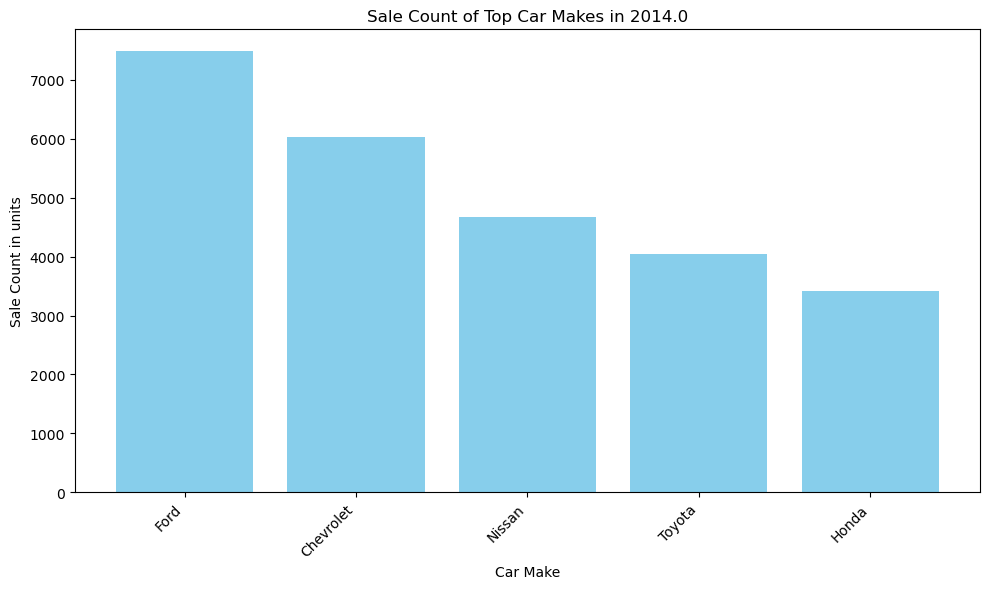

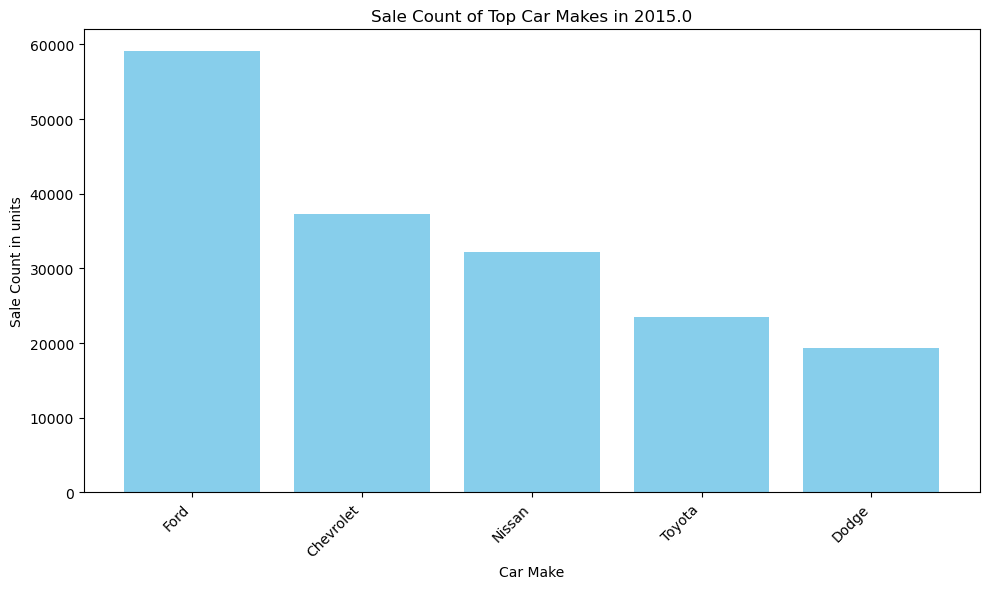

In [33]:
# Create a bar graph for each year
for year, data in top_5_cars_sold.groupby('year'):
    plt.figure(figsize=(10, 6))
    plt.bar(data['make'], data['sales_count'], color='skyblue')
    plt.xlabel('Car Make')
    plt.ylabel('Sale Count in units')
    plt.title(f'Sale Count of Top Car Makes in {year}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [10]:
cleaned_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [11]:
make = cleaned_df['make'].value_counts()
make

make
Ford             81013
Chevrolet        54150
Nissan           44043
Toyota           35313
Dodge            27181
Honda            24781
Hyundai          18659
BMW              17509
Kia              15828
Chrysler         15133
Infiniti         14011
Mercedes-Benz    14008
Jeep             12735
Volkswagen       10780
Lexus            10409
GMC               9217
Mazda             6930
Cadillac          6315
Lincoln           4926
Audi              4802
Acura             4503
Buick             4470
Subaru            4369
Ram               4044
Pontiac           4018
Mitsubishi        3661
Volvo             3082
MINI              2946
Saturn            2570
Mercury           1571
Scion             1545
Land Rover        1322
Jaguar            1257
Porsche           1157
Suzuki             977
HUMMER             768
FIAT               725
Saab               416
smart              343
Oldsmobile         318
Isuzu              179
Maserati           109
Bentley            105
Aston 